문제점 : 예측이 될 때도 있고 안 될 때도 있음  
=> 노드 개수가 적어서 그런 것 같음  

In [129]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as pilimg

## [1] 데이터 로딩 및 전처리

In [130]:
(x_train, y_train), (x_test, y_test)=load_data()

In [131]:
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

### 데이터셋에 노이즈 추가

In [132]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력사이즈size=None)
x_train_noised=x_train+np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised=x_test+np.random.normal(0, 0.5,size=x_test.shape)

# 픽셀 범위 0.0~1.0
# np.clip(array, min, max)
x_train_noised=np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised=np.clip(x_test_noised, a_min=0, a_max=1)

In [133]:
x_train.shape, x_test.shape, x_train_noised.shape, x_test_noised.shape

((48000, 28, 28), (10000, 28, 28), (48000, 28, 28), (10000, 28, 28))

In [134]:
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)
x_train_noised=x_train_noised.reshape(-1, 28, 28, 1)
x_test_noised=x_test_noised.reshape(-1, 28, 28, 1)

reshape(-1, 28, 28, 1)을 하는 이유  
Conv2D에서는 채널 개수까지 들어가야함  
그냥 Dense 할 때는 채널 개수는 필요 없어서 reshape(-1, 28, 28)

In [135]:
x_train.shape, x_test.shape, x_train_noised.shape, x_test_noised.shape

((48000, 28, 28, 1),
 (10000, 28, 28, 1),
 (48000, 28, 28, 1),
 (10000, 28, 28, 1))

In [ ]:
# 스케일링
x_train=x_train/255.0
x_test=x_test/255.0
x_train_noised=x_train_noised/255.0
x_test_noised=x_test_noised/255.0

## [2] 모델 생성 및 학습

In [159]:
def createAEModel(num):
    '''
    CNN 활용 모델 생성 함수
    '''
    
    model=Sequential(name='model_'+str(num))
    model.add(Conv2D(filters=num, kernel_size=3, padding='same',
                     input_shape=(28, 28, 1),
                    activation='relu'))
    model.add(Conv2D(filters=num, kernel_size=3, padding='same',
                    activation='relu'))
    model.add(Conv2D(filters=1, kernel_size=3, padding='same',
                    activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

보통 Conv2D와 MaxPooling은 짝꿍이지만 MaxPooling을 하면 size가 반틈으로 줄어듦  
그래서 MaxPooling 안 씀  
Conv2D의 padding 파라미터에 'same'을 넣어줘야 size가 안 줄어들어서 padding='same'  
마지막 층 output이 (None, 28, 28, 1)이 되어야 하기 때문에 Conv2D 마지막 층에는 노드 개수가 1개만 들어가야 함  
activation이 sigmoid니까 model.compile(loss=<b>'binary_crossentropy'</b>)

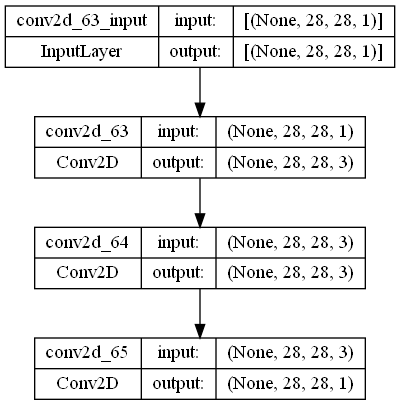

In [138]:
plot_model(createAEModel(3), show_shapes=True)

In [139]:
def study_cnn(model, num):
    '''
    모델 학습하고 예측하는 함수
    '''
    
    model.fit(x_train_noised, x_train, epochs=10)
    pre_out=model.predict(x_test_noised[num].reshape(-1, 28, 28, 1))
    
    # 노이즈 사진 출력
    plt.imshow(x_test_noised[num].reshape(28, 28), cmap='gray')
    plt.show()

    # 예측 사진 출력
    plt.imshow(pre_out.reshape(28, 28), cmap='gray')
    plt.show()

Epoch 1/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3358
Epoch 2/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1369
Epoch 3/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1130
Epoch 4/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1024
Epoch 5/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0916
Epoch 6/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0876
Epoch 7/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0863
Epoch 8/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0856
Epoch 9/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0849
Epoch 10/10
1/1 [==============================] - 0s 119ms/step


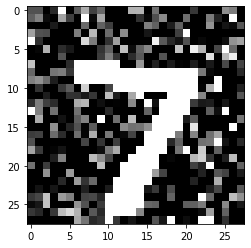

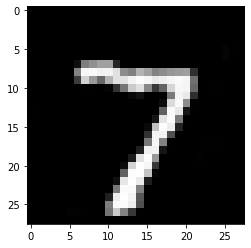

In [140]:
study_cnn(createAEModel(3), 0)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3264
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1368
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1135
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1052
Epoch 5/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0954
Epoch 6/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0891
Epoch 7/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0867
Epoch 8/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0859
Epoch 9/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0853
Epoch 10/10
1/1 [==============================] - 0s 118ms/step


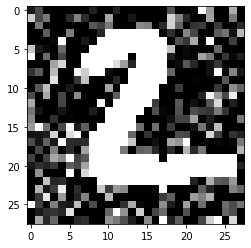

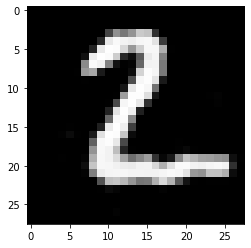

In [141]:
study_cnn(createAEModel(2), 1)

Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5218
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4012
Epoch 3/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3883
Epoch 4/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3879
Epoch 5/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3879
Epoch 6/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3879
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3879
Epoch 8/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3879
Epoch 9/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3879
Epoch 10/10
1/1 [==============================] - 0s 117ms/step


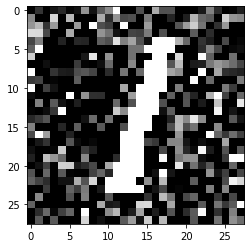

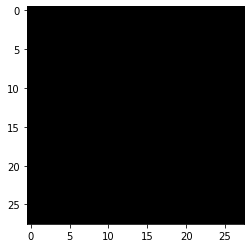

In [153]:
study_cnn(createAEModel(1), 2)

Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3989
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1703
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1192
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1079
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0999
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0914
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0879
Epoch 8/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0868
Epoch 9/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0863
Epoch 10/10
1/1 [==============================] - 0s 120ms/step


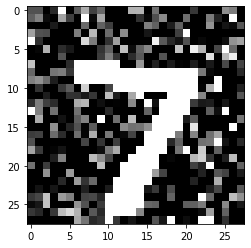

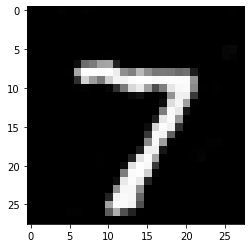

In [154]:
study_cnn(createAEModel(1), 0)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4298
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3950
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3835
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3725
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3691
Epoch 6/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3680
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3676
Epoch 8/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3674
Epoch 9/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3673
Epoch 10/10
1/1 [==============================] - 0s 67ms/step


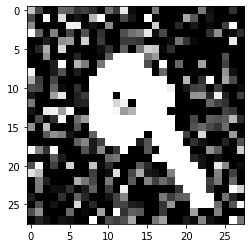

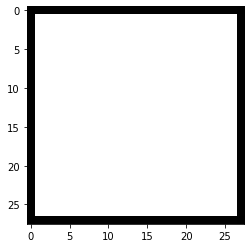

In [155]:
study_cnn(createAEModel(1), 7)

1
Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3947
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1667
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1200
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1094
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1035
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0956
Epoch 7/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0884
Epoch 8/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0864
Epoch 9/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0860
Epoch 10/10
1/1 [==============================] - 0s 73ms/step


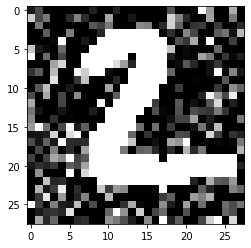

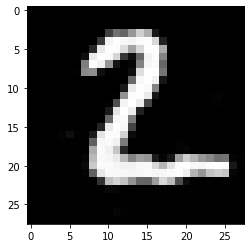

3
Epoch 1/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5216
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4011
Epoch 3/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3883
Epoch 4/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3879
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3879
Epoch 6/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3879
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3879
Epoch 8/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3879
Epoch 9/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3879
Epoch 10/10
1/1 [==============================] - 0s 58ms/step


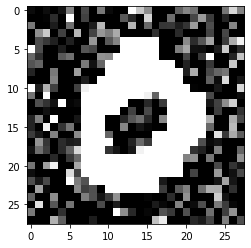

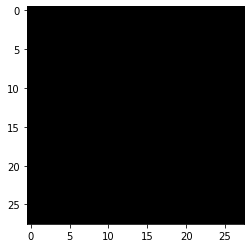

4
Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5215
Epoch 2/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.4011
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3883
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3879
Epoch 5/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3879
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3879
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3879
Epoch 8/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3879
Epoch 9/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3879
Epoch 10/10
1/1 [==============================] - 0s 54ms/step


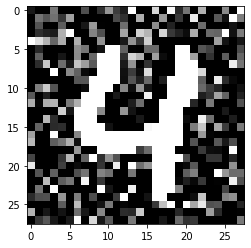

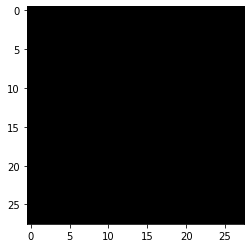

5
Epoch 1/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4242
Epoch 2/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3896
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3781
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3710
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3687
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3679
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3676
Epoch 8/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3674
Epoch 9/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3673
Epoch 10/10
1/1 [==============================] - 0s 100ms/step


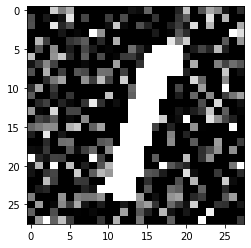

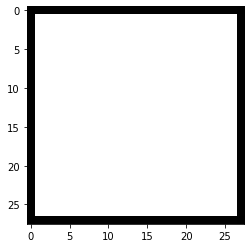

6
Epoch 1/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4286
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3966
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3876
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3747
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3696
Epoch 6/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3682
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3676
Epoch 8/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3674
Epoch 9/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3673
Epoch 10/10
1/1 [==============================] - 0s 75ms/step


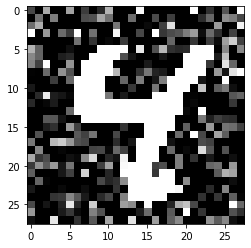

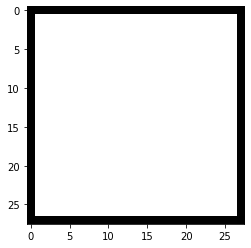

8
Epoch 1/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3735
Epoch 2/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.1566
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1176
Epoch 4/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1079
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1018
Epoch 6/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0932
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0881
Epoch 8/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0867
Epoch 9/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0862
Epoch 10/10
1/1 [==============================] - 0s 57ms/step


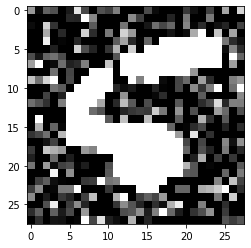

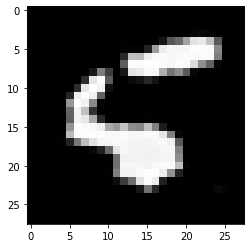

9
Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4241
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3942
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3838
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3731
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3693
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3681
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3676
Epoch 8/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3674
Epoch 9/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3673
Epoch 10/10
1/1 [==============================] - 0s 63ms/step


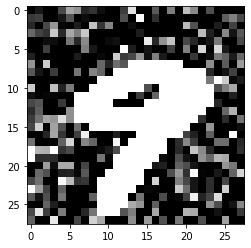

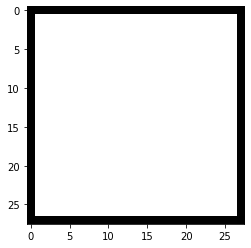

In [156]:
# createAEModel(1)이 예측하는게 될 때도 있고 안 될 때도 있어서
# 0~9번까지 다 돌려봄
for i in range(10):
    if i not in [0, 2, 7]:
        print('='*50)
        print(i)
        study_cnn(createAEModel(1), i)

Epoch 1/10
1500/1500 [==============================] - 133s 89ms/step - loss: 0.1624
Epoch 2/10
1500/1500 [==============================] - 137s 91ms/step - loss: 0.0868
Epoch 3/10
1500/1500 [==============================] - 136s 91ms/step - loss: 0.0858
Epoch 4/10
1500/1500 [==============================] - 138s 92ms/step - loss: 0.0845
Epoch 5/10
1500/1500 [==============================] - 138s 92ms/step - loss: 0.0827
Epoch 6/10
1500/1500 [==============================] - 228s 152ms/step - loss: 0.0811
Epoch 7/10
1500/1500 [==============================] - 243s 162ms/step - loss: 0.0803
Epoch 8/10
1500/1500 [==============================] - 130s 87ms/step - loss: 0.0799
Epoch 9/10
1500/1500 [==============================] - 129s 86ms/step - loss: 0.0797
Epoch 10/10
1/1 [==============================] - 0s 167ms/step


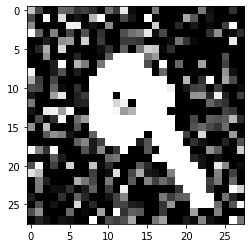

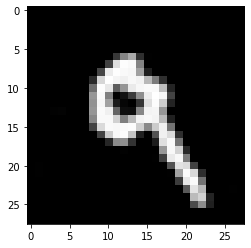

In [158]:
# createAEModel(1)이 못하던거 createAEModel(64)가 예측 함
# => 그냥 노드 개수가 적어서 예측을 잘 못하던게 아니었을까?
study_cnn(createAEModel(64), 7)

얘는 예측 잘 됨

In [174]:
def study_cnn_2(model, num):
    '''
    모델 학습하고 예측하는 함수  epoch=5 버전(시간 너무 오래 걸려서)
    '''
    
    model.fit(x_train_noised, x_train, epochs=5)
    pre_out=model.predict(x_test_noised[num].reshape(-1, 28, 28, 1))
    
    # 원본 사진 출력
    plt.imshow(x_test_noised[num].reshape(28, 28), cmap='gray')
    plt.show()

    # 예측 사진 출력
    plt.imshow(pre_out.reshape(28, 28), cmap='gray')
    plt.show()

i : 0
Epoch 1/5
1500/1500 [==============================] - 146s 96ms/step - loss: 0.2017
Epoch 2/5
1500/1500 [==============================] - 136s 91ms/step - loss: 0.1012
Epoch 3/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0869
Epoch 4/5
1500/1500 [==============================] - 70s 46ms/step - loss: 0.0859
Epoch 5/5
1/1 [==============================] - 0s 115ms/step


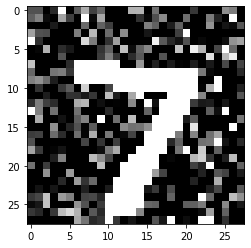

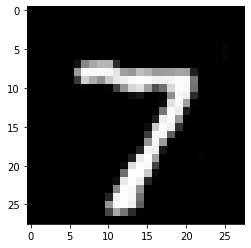


i : 1
Epoch 1/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1822
Epoch 2/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0881
Epoch 3/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0861
Epoch 4/5
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0855
Epoch 5/5
1/1 [==============================] - 0s 85ms/step


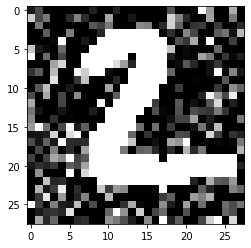

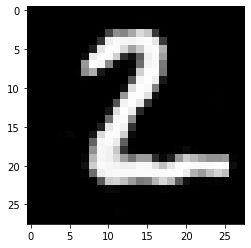


i : 2
Epoch 1/5
1500/1500 [==============================] - 69s 45ms/step - loss: 0.1904
Epoch 2/5
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0916
Epoch 3/5
1500/1500 [==============================] - 73s 48ms/step - loss: 0.0864
Epoch 4/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0855
Epoch 5/5
1/1 [==============================] - 0s 80ms/step


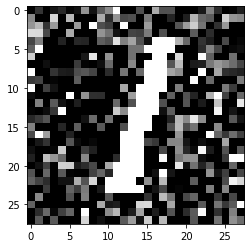

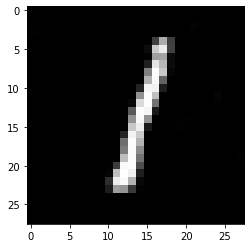


i : 3
Epoch 1/5
1500/1500 [==============================] - 78s 52ms/step - loss: 0.1797
Epoch 2/5
1500/1500 [==============================] - 124s 83ms/step - loss: 0.0867
Epoch 3/5
1500/1500 [==============================] - 148s 98ms/step - loss: 0.0851
Epoch 4/5
1500/1500 [==============================] - 147s 98ms/step - loss: 0.0841
Epoch 5/5
1/1 [==============================] - 0s 286ms/step


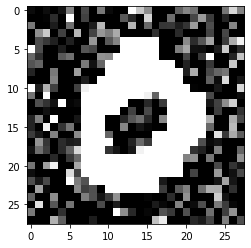

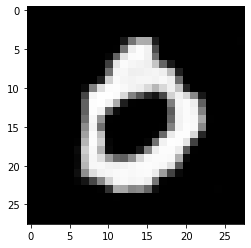


i : 4
Epoch 1/5
1500/1500 [==============================] - 158s 104ms/step - loss: 0.1869
Epoch 2/5
1500/1500 [==============================] - 155s 103ms/step - loss: 0.0885
Epoch 3/5
1500/1500 [==============================] - 151s 101ms/step - loss: 0.0853
Epoch 4/5
1500/1500 [==============================] - 153s 102ms/step - loss: 0.0839
Epoch 5/5
1/1 [==============================] - 0s 244ms/step


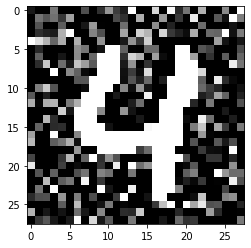

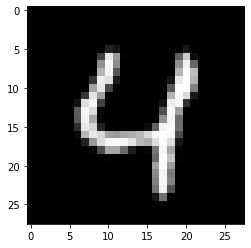


i : 5
Epoch 1/5
1500/1500 [==============================] - 149s 98ms/step - loss: 0.1862
Epoch 2/5
1500/1500 [==============================] - 151s 101ms/step - loss: 0.0933
Epoch 3/5
1500/1500 [==============================] - 148s 99ms/step - loss: 0.0862
Epoch 4/5
1500/1500 [==============================] - 146s 97ms/step - loss: 0.0854
Epoch 5/5
1/1 [==============================] - 0s 265ms/step


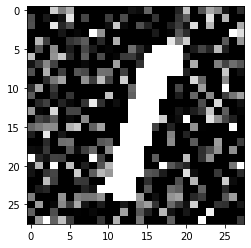

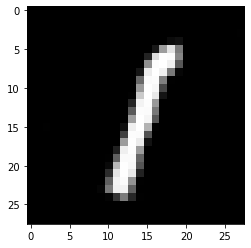


i : 6
Epoch 1/5
1500/1500 [==============================] - 148s 97ms/step - loss: 0.1890
Epoch 2/5
1500/1500 [==============================] - 150s 100ms/step - loss: 0.0904
Epoch 3/5
1500/1500 [==============================] - 149s 99ms/step - loss: 0.0864
Epoch 4/5
1500/1500 [==============================] - 150s 100ms/step - loss: 0.0850
Epoch 5/5
1/1 [==============================] - 0s 231ms/step


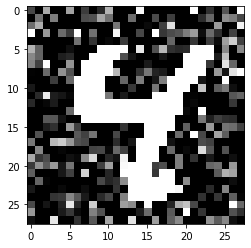

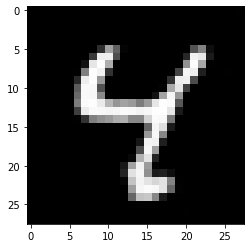


i : 7
Epoch 1/5
1500/1500 [==============================] - 152s 100ms/step - loss: 0.1901
Epoch 2/5
1500/1500 [==============================] - 146s 97ms/step - loss: 0.0952
Epoch 3/5
1500/1500 [==============================] - 152s 102ms/step - loss: 0.0859
Epoch 4/5
1500/1500 [==============================] - 147s 98ms/step - loss: 0.0850
Epoch 5/5
1/1 [==============================] - 0s 316ms/step


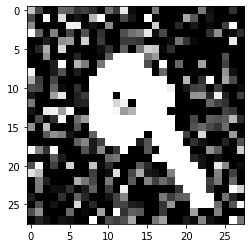

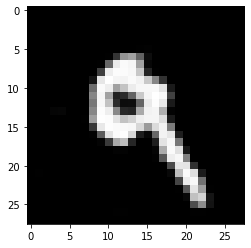


i : 8
Epoch 1/5
1500/1500 [==============================] - 148s 97ms/step - loss: 0.1836
Epoch 2/5
1500/1500 [==============================] - 146s 97ms/step - loss: 0.0877
Epoch 3/5
1500/1500 [==============================] - 148s 99ms/step - loss: 0.0865
Epoch 4/5
1500/1500 [==============================] - 148s 98ms/step - loss: 0.0858
Epoch 5/5
1/1 [==============================] - 0s 293ms/step


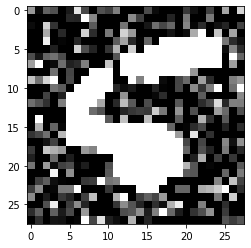

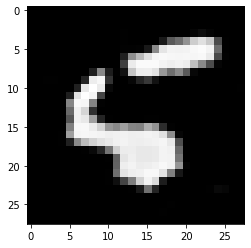


i : 9
Epoch 1/5
  76/1500 [>.............................] - ETA: 2:16 - loss: 0.4855

KeyboardInterrupt: 

In [176]:
for i in range(10):
    print('='*80)
    print('i :',i)
    study_cnn_2(createAEModel(32), i)
    print()  # 줄바꿈
    
    
# 9번은 시간이 너무 오래 걸려서 멈췄음
# 노드 수 늘리니까 예측 잘 됨